# NAEP 2017 Longitutinal Data Mining Competition Dataset 

## Dataset Characteristics

**Has GROUPING field**

* Has various user-grouping fields (average knowledge, average carelessness)

* Evaluation: Corrects, Hints, First Response correct

## Preliminaries

### Constants

In [1]:
# paths
PATH_TO_INTERACTION_DATA = '../../../../../data/NAEP_2017_ASSISTments_Released Full Dataset/anonymized_full_release_competition_dataset.csv'

# dataset name
DATASET_NAME = 'naep_2017_longitutinal_data_mining_competition'

# fields used in the analysis
USER_FIELD = 'studentId'
GROUP_FIELD = 'assignmentId'
LEARNING_ACTIVITY_FIELD = 'problemId'

# fields used in dataset preparation
TIMESTAMP_FIELD = 'startTime'

### Import Packages

In [2]:
from utilities.sequence_similarity import *
from utilities.sequence_similarity_no_group import *
from utilities.functions import *
from utilities.constants import *

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import textdistance as td
import pickle

### Seaborn Configuration

In [3]:
sns.set(rc = {'figure.figsize':(15,8)})

In [4]:
#sns.set_context("notebook", rc={"font.size":20,"axes.titlesize":30,"axes.labelsize":20, "xtick.labelsize":16, "ytick.labelsize":16, "legend.fontsize":20, "legend.title_fontsize":20})   

In [5]:
sns.set_style("darkgrid")

In [6]:
marker_config = {"marker":"o",
                 "markerfacecolor":"white", 
                 "markeredgecolor":"black",
                 "markersize":"10"}

### Import Pickled Objects

In [7]:
# with open(PATH_TO_PICKLED_OBJECTS_FOLDER + DATASET_NAME + SEQUENCE_DISTANCE_DICT_PER_GROUP_PICKLE_NAME, 'rb') as f:
#     seq_dist_per_group_dict = pickle.load(f)

# with open(PATH_TO_PICKLED_OBJECTS_FOLDER + DATASET_NAME + SEQUENCE_DISTANCE_DICT_PICKLE_NAME, 'rb') as f:
#     seq_dist_dict = pickle.load(f)

## Functions

## Dataset Preparation

### Import Data

In [8]:
interactions = pd.read_csv(PATH_TO_INTERACTION_DATA)

c:\Users\sschmerda\Anaconda3\envs\DDIA\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (76,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
interactions[TIMESTAMP_FIELD] = pd.to_datetime(interactions[TIMESTAMP_FIELD], errors='coerce', unit='s', origin='unix')
interactions['endTime'] = pd.to_datetime(interactions['endTime'], errors='coerce', unit='s', origin='unix')

In [ ]:
interactions

### Merge and Filter Data

In [10]:
interactions = interactions[['studentId', 'MiddleSchoolId', 'SY ASSISTments Usage', 'action_num', 'skill', 'problemId', 'problemType', 'assignmentId', 'assistmentId', 'startTime', 'endTime', 'correct', 'original']]

### Filter Sequences by NAs in Dataset 

In [11]:
# only timestamps contain NAs
pct_na = get_nas_in_data(interactions)
pct_na

studentId               0.0 %
MiddleSchoolId          0.0 %
SY ASSISTments Usage    0.0 %
action_num              0.0 %
skill                   0.0 %
problemId               0.0 %
problemType             0.0 %
assignmentId            0.0 %
assistmentId            0.0 %
startTime               0.0 %
endTime                 0.0 %
correct                 0.0 %
original                0.0 %
dtype: object

In [12]:
interactions = drop_na_by_fields(interactions, field_list=[GROUP_FIELD, USER_FIELD, LEARNING_ACTIVITY_FIELD, TIMESTAMP_FIELD])

Input length: 942816
Outpunt length: 942816
Number of rows removed: 0
Percentage of rows removed: 0%


### Sort by Timestamp

In [13]:
interactions = sort_by_timestamp(interactions, TIMESTAMP_FIELD, higher_level_sort_list=[GROUP_FIELD, USER_FIELD])

### Transform Data

In [14]:
interactions = keep_last_repeated_learning_activities(interactions, GROUP_FIELD, USER_FIELD, LEARNING_ACTIVITY_FIELD, TIMESTAMP_FIELD)

100%|██████████| 10932/10932 [00:02<00:00, 5200.74it/s]


Initial number of interactions: 942816
Final number of interactions: 447296
Removed number of interactions: 495520
Removed percentage of interactions: 52.557444930930316%


## Summary Statistics and Plots 

In [15]:
print_summary_stats(interactions, USER_FIELD, GROUP_FIELD, LEARNING_ACTIVITY_FIELD, USER_FIELD_NAME_STR, GROUP_FIELD_NAME_STR, LEARNING_ACTIVITY_FIELD_NAME_STR, has_group_field=True)

number of interactions: 447296
number of unique Topics: 268
number of unique Users: 1709
number of unique Learning Resources: 3162


### Dataset Specific Characteristics

### Interactions per User

In [16]:
interactions_per_user = print_and_return_interactions_per_user(interactions, USER_FIELD, USER_FIELD_NAME_STR)

mean number of interactions per User: 261.7296664716208
median number of interactions per User: 229.0
max number of interactions per User: 1242
min number of interactions per User: 2


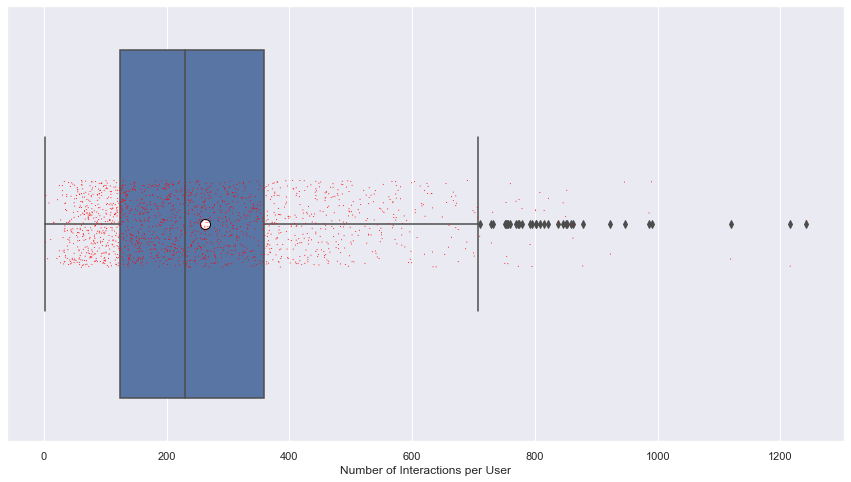

In [17]:
g = sns.boxplot(data=interactions_per_user, x='number of interactions', showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=interactions_per_user, x='number of interactions', size=1, color="red");
g.set(xlabel='Number of Interactions per User');

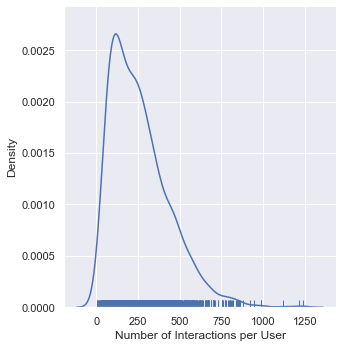

In [18]:
g = sns.displot(data=interactions_per_user, x='number of interactions', log_scale=False, kind='kde', rug=True)
g.set(xlabel='Number of Interactions per User');

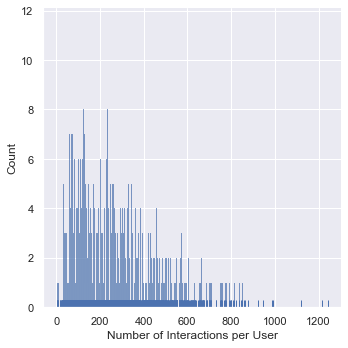

In [19]:
g = sns.displot(data=interactions_per_user, x='number of interactions', log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel='Number of Interactions per User');

### Number of Unique Groups per User

In [20]:
n_unique_groups_per_user = print_and_return_unique_col2_per_col1(interactions, USER_FIELD, GROUP_FIELD, NUMBER_UNIQUE_GROUPS_PER_USER_STR)

mean Number of Unique Topics per User: 6.39672322995904
median Number of Unique Topics per User: 5.0
max Number of Unique Topics per User: 38
min Number of Unique Topics per User: 1


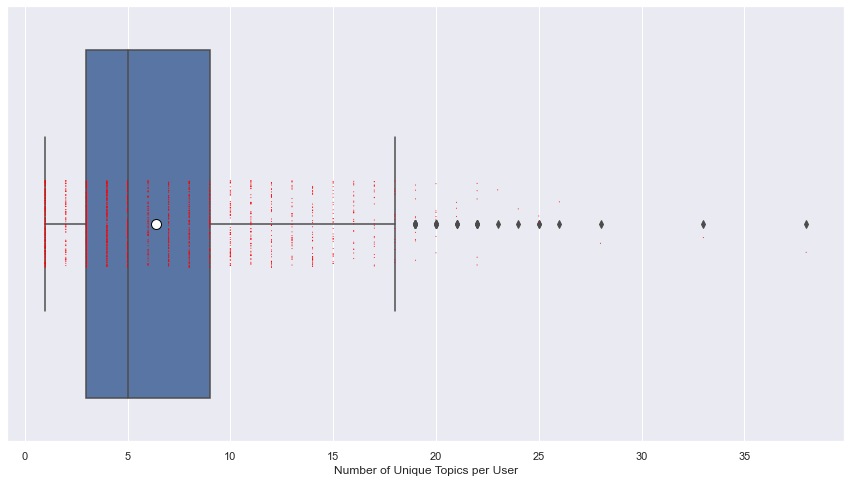

In [21]:
g = sns.boxplot(data=n_unique_groups_per_user, x=NUMBER_UNIQUE_GROUPS_PER_USER_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=n_unique_groups_per_user, x=NUMBER_UNIQUE_GROUPS_PER_USER_STR, size=1, color="red");
g.set(xlabel=NUMBER_UNIQUE_GROUPS_PER_USER_STR);

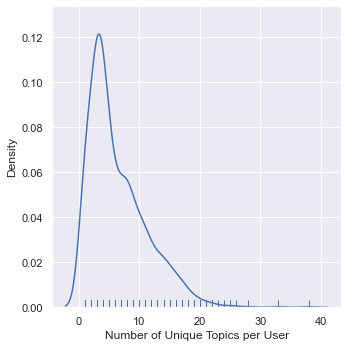

In [22]:
g = sns.displot(data=n_unique_groups_per_user, x=NUMBER_UNIQUE_GROUPS_PER_USER_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=NUMBER_UNIQUE_GROUPS_PER_USER_STR);

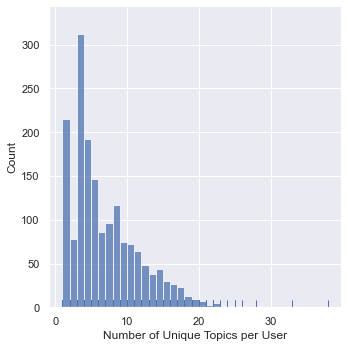

In [23]:
g = sns.displot(data=n_unique_groups_per_user, x=NUMBER_UNIQUE_GROUPS_PER_USER_STR, log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel=NUMBER_UNIQUE_GROUPS_PER_USER_STR);

### Number of Unique Learning Activities per User

In [24]:
n_unique_learning_activities_per_user = print_and_return_unique_col2_per_col1(interactions, USER_FIELD, LEARNING_ACTIVITY_FIELD, NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR)

mean Number of Unique Learning Resources per User: 228.39730836746637
median Number of Unique Learning Resources per User: 204.0
max Number of Unique Learning Resources per User: 805
min Number of Unique Learning Resources per User: 2


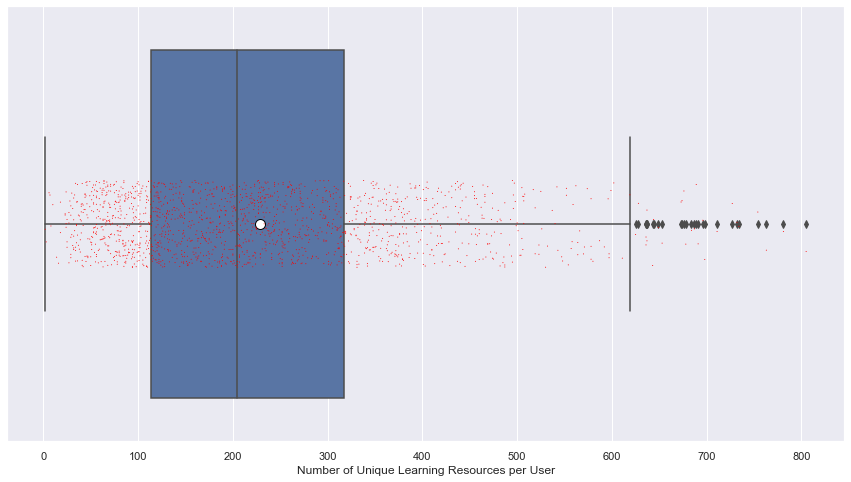

In [25]:
g = sns.boxplot(data=n_unique_learning_activities_per_user, x=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=n_unique_learning_activities_per_user, x=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR, size=1, color="red");
g.set(xlabel=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR);

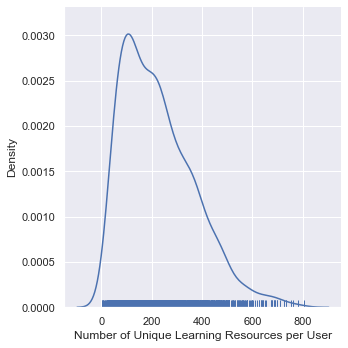

In [26]:
g = sns.displot(data=n_unique_learning_activities_per_user, x=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR);

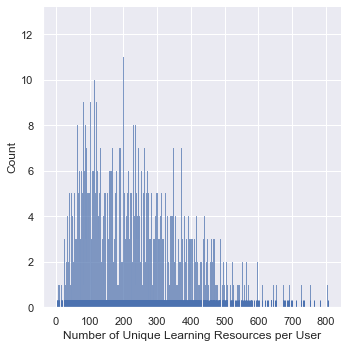

In [27]:
g = sns.displot(data=n_unique_learning_activities_per_user, x=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR, log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR);

### Number of Unique Users per Group

In [28]:
n_unique_users_per_group = print_and_return_unique_col2_per_col1(interactions, GROUP_FIELD, USER_FIELD, NUMBER_UNIQUE_USERS_PER_GROUP_STR)

mean Number of Unique Users per Topic: 40.791044776119406
median Number of Unique Users per Topic: 21.5
max Number of Unique Users per Topic: 1010
min Number of Unique Users per Topic: 1


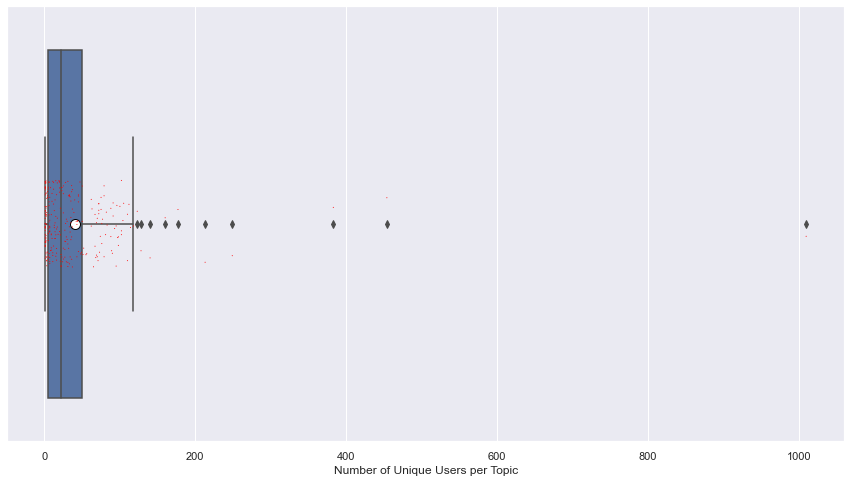

In [29]:
g = sns.boxplot(data=n_unique_users_per_group, x=NUMBER_UNIQUE_USERS_PER_GROUP_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=n_unique_users_per_group, x=NUMBER_UNIQUE_USERS_PER_GROUP_STR, size=1, color="red");
g.set(xlabel=NUMBER_UNIQUE_USERS_PER_GROUP_STR);

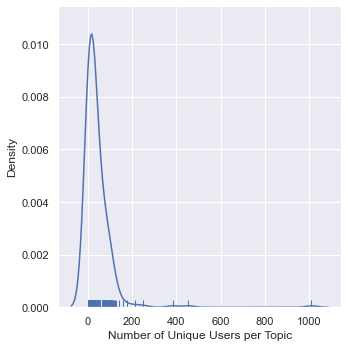

In [30]:
g = sns.displot(data=n_unique_users_per_group, x=NUMBER_UNIQUE_USERS_PER_GROUP_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=NUMBER_UNIQUE_USERS_PER_GROUP_STR);

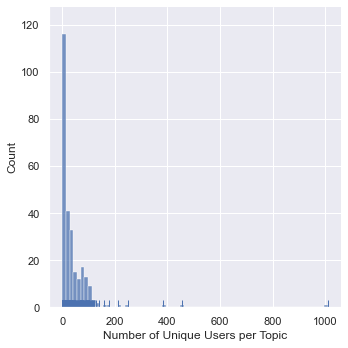

In [31]:
g = sns.displot(data=n_unique_users_per_group, x=NUMBER_UNIQUE_USERS_PER_GROUP_STR, log_scale=False, kind='hist', rug=True)
g.set(xlabel=NUMBER_UNIQUE_USERS_PER_GROUP_STR);

### Number of Unique Learning Activities per Group

In [32]:
n_unique_learning_activities_per_group = print_and_return_unique_col2_per_col1(interactions, GROUP_FIELD, LEARNING_ACTIVITY_FIELD, NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_GROUP_STR)

mean Number of Unique Learning Resources per Topic: 68.72014925373135
median Number of Unique Learning Resources per Topic: 43.5
max Number of Unique Learning Resources per Topic: 1155
min Number of Unique Learning Resources per Topic: 1


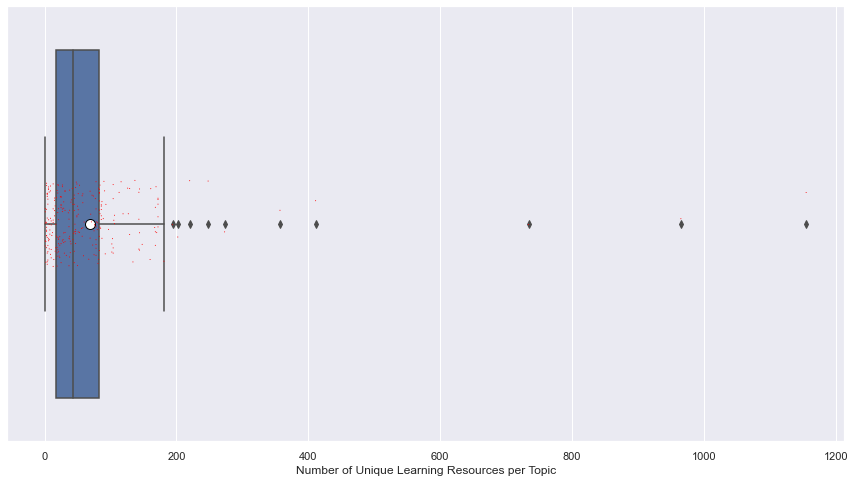

In [33]:
g = sns.boxplot(data=n_unique_learning_activities_per_group, x=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_GROUP_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=n_unique_learning_activities_per_group, x=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_GROUP_STR, size=1, color="red");
g.set(xlabel=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_GROUP_STR);

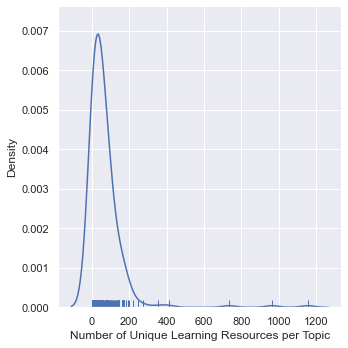

In [34]:
g = sns.displot(data=n_unique_learning_activities_per_group, x=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_GROUP_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_GROUP_STR);

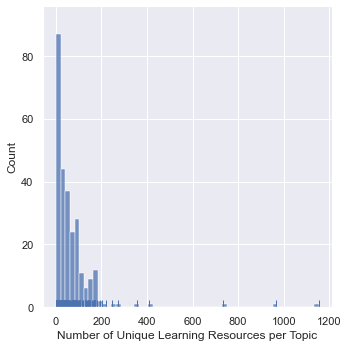

In [35]:
g = sns.displot(data=n_unique_learning_activities_per_group, x=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_GROUP_STR, log_scale=False, kind='hist', rug=True)
g.set(xlabel=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_GROUP_STR);

### Number of Unique Users per Learning Activity

In [36]:
n_unique_users_per_learning_activity = print_and_return_unique_col2_per_col1(interactions, LEARNING_ACTIVITY_FIELD, USER_FIELD, NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR)

mean Number of Unique Users per Learning Resource: 123.44433902593295
median Number of Unique Users per Learning Resource: 90.0
max Number of Unique Users per Learning Resource: 710
min Number of Unique Users per Learning Resource: 1


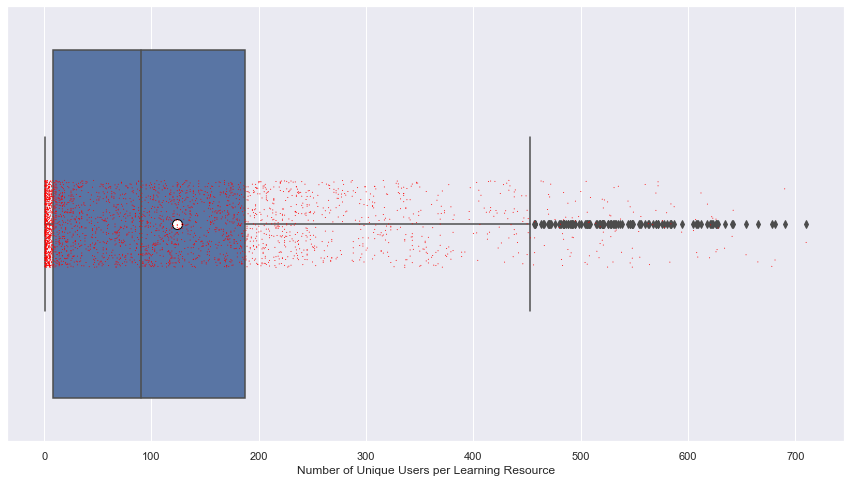

In [37]:
g = sns.boxplot(data=n_unique_users_per_learning_activity, x=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=n_unique_users_per_learning_activity, x=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR, size=1, color="red");
g.set(xlabel=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR);

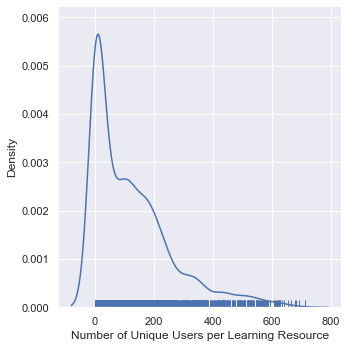

In [38]:
g = sns.displot(data=n_unique_users_per_learning_activity, x=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR);

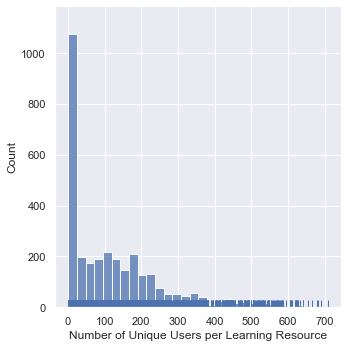

In [39]:
g = sns.displot(data=n_unique_users_per_learning_activity, x=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR, log_scale=False, kind='hist', rug=True)
g.set(xlabel=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR);

### Avg Number of Interactions over Groups for a User (User Sequence Length)

In [40]:
mean_n_interactions_over_groups, median_n_interactions_over_groups = print_and_return_avg_num_interactions_over_col2_for_col1(interactions, USER_FIELD, GROUP_FIELD, MEAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR, MEDIAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR)

mean of Mean Number of Interactions over Topics for a User: 57.884670370446365
median of Mean Number of Interactions over Topics for a User: 40.0
max of Mean Number of Interactions over Topics for a User: 687.0
min of Mean Number of Interactions over Topics for a User: 2.0

__________________________________________________

mean of Median Number of Interactions over Topics for a User: 42.759801053247514
median of Median Number of Interactions over Topics for a User: 26.5
max of Median Number of Interactions over Topics for a User: 687.0
min of Median Number of Interactions over Topics for a User: 1.0


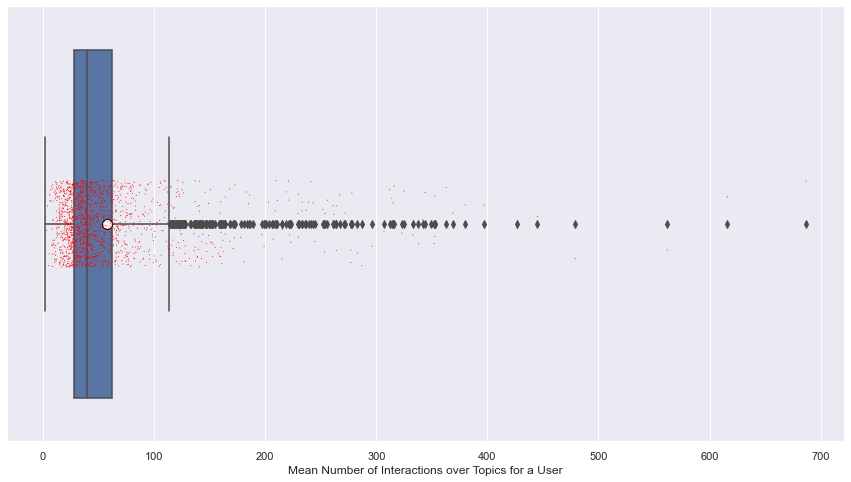

In [41]:
g = sns.boxplot(data=mean_n_interactions_over_groups, x=MEAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=mean_n_interactions_over_groups, x=MEAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR, size=1, color="red");
g.set(xlabel=MEAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR);

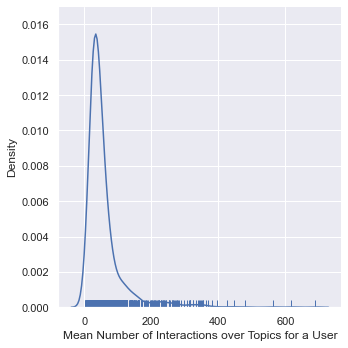

In [42]:
g = sns.displot(data=mean_n_interactions_over_groups, x=MEAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=MEAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR);

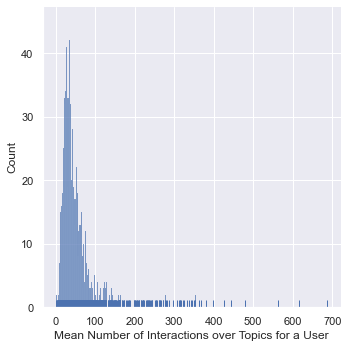

In [43]:
g = sns.displot(data=mean_n_interactions_over_groups, x=MEAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR, log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel=MEAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR);

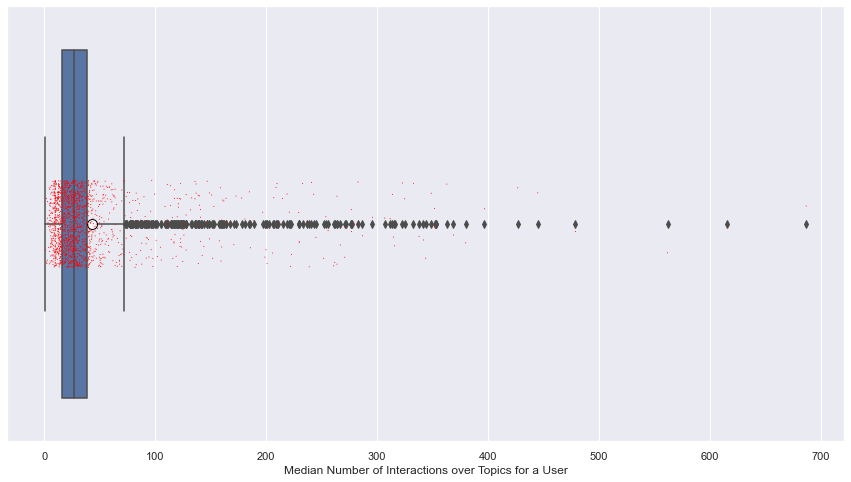

In [44]:
g = sns.boxplot(data=median_n_interactions_over_groups, x=MEDIAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=median_n_interactions_over_groups, x=MEDIAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR, size=1, color="red");
g.set(xlabel=MEDIAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR);

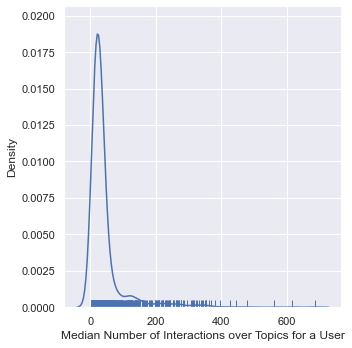

In [45]:
g = sns.displot(data=median_n_interactions_over_groups, x=MEDIAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=MEDIAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR);

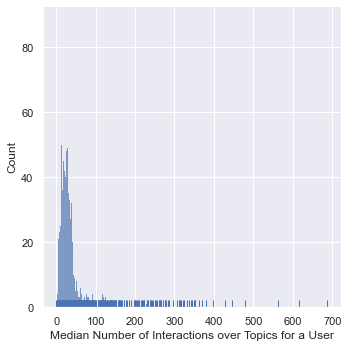

In [46]:
g = sns.displot(data=median_n_interactions_over_groups, x=MEDIAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR, log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel=MEDIAN_NUMBER_INTERACTIONS_OVER_GROUPS_FOR_USER_STR);

### Avg Number of Interactions over Users for a Group (Group Sequence Length)

In [47]:
mean_n_interactions_over_users, median_n_interactions_over_users = print_and_return_avg_num_interactions_over_col2_for_col1(interactions, GROUP_FIELD, USER_FIELD, MEAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR, MEDIAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR)

mean of Mean Number of Interactions over Users for a Topic: 23.539613598099425
median of Mean Number of Interactions over Users for a Topic: 17.941176470588236
max of Mean Number of Interactions over Users for a Topic: 213.33333333333334
min of Mean Number of Interactions over Users for a Topic: 1.0

__________________________________________________

mean of Median Number of Interactions over Users for a Topic: 22.44776119402985
median of Median Number of Interactions over Users for a Topic: 16.0
max of Median Number of Interactions over Users for a Topic: 232.5
min of Median Number of Interactions over Users for a Topic: 1.0


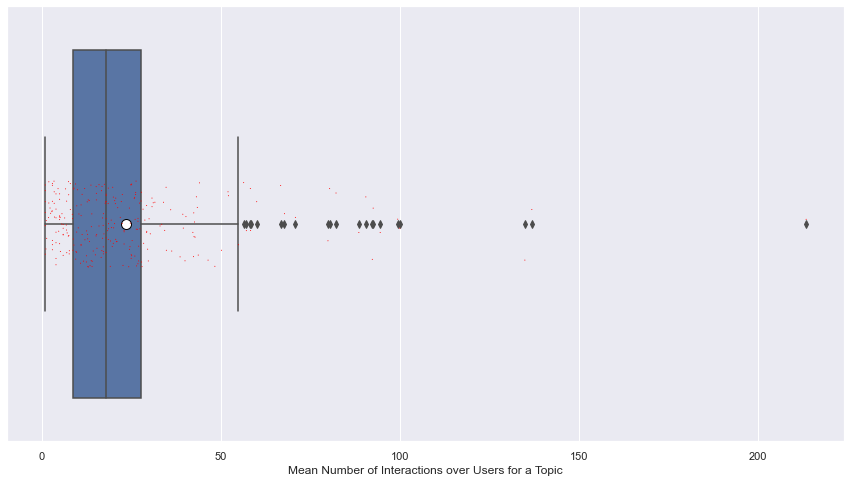

In [48]:
g = sns.boxplot(data=mean_n_interactions_over_users, x=MEAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=mean_n_interactions_over_users, x=MEAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR, size=1, color="red");
g.set(xlabel=MEAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR);

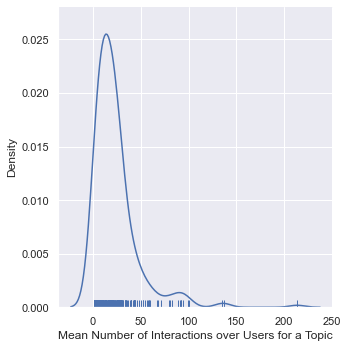

In [49]:
g = sns.displot(data=mean_n_interactions_over_users, x=MEAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=MEAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR);

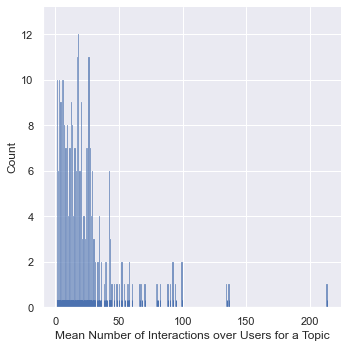

In [50]:
g = sns.displot(data=mean_n_interactions_over_users, x=MEAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR, log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel=MEAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR);

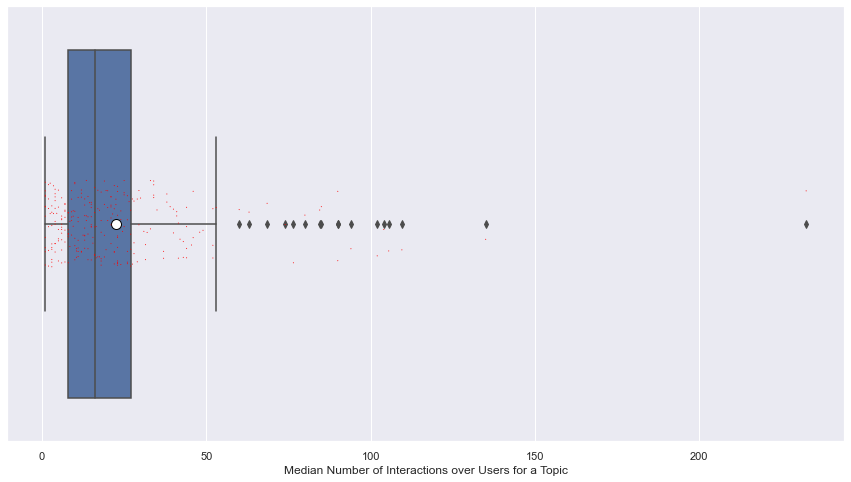

In [51]:
g = sns.boxplot(data=median_n_interactions_over_users, x=MEDIAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=median_n_interactions_over_users, x=MEDIAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR, size=1, color="red");
g.set(xlabel=MEDIAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR);

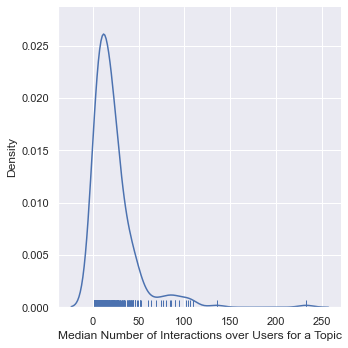

In [52]:
g = sns.displot(data=median_n_interactions_over_users, x=MEDIAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=MEDIAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR);

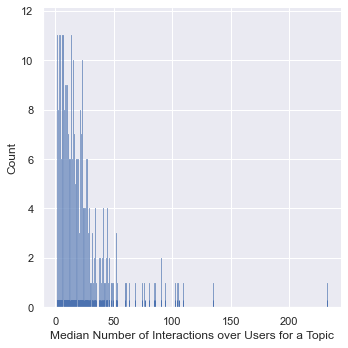

In [53]:
g = sns.displot(data=median_n_interactions_over_users, x=MEDIAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR, log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel=MEDIAN_NUMBER_INTERACTIONS_OVER_USERS_FOR_GROUP_STR);

### Avg Number of Unique Learning Activities over Groups for a User

In [54]:
mean_n_unique_learning_activities_over_groups_for_user, median_n_unique_learning_activities_over_groups_for_user = print_and_return_avg_num_unique_col3_over_col2_for_col1(interactions, USER_FIELD, GROUP_FIELD, LEARNING_ACTIVITY_FIELD, MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR, MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR)

mean of Mean Number of Unique Learning Resources over Topics for a User: 53.82918601832436
median of Mean Number of Unique Learning Resources over Topics for a User: 36.05555555555556
max of Mean Number of Unique Learning Resources over Topics for a User: 673.0
min of Mean Number of Unique Learning Resources over Topics for a User: 2.0

__________________________________________________

mean of Median Number of Unique Learning Resources over Topics for a User: 40.241369221767116
median of Median Number of Unique Learning Resources over Topics for a User: 25.0
max of Median Number of Unique Learning Resources over Topics for a User: 673.0
min of Median Number of Unique Learning Resources over Topics for a User: 1.0


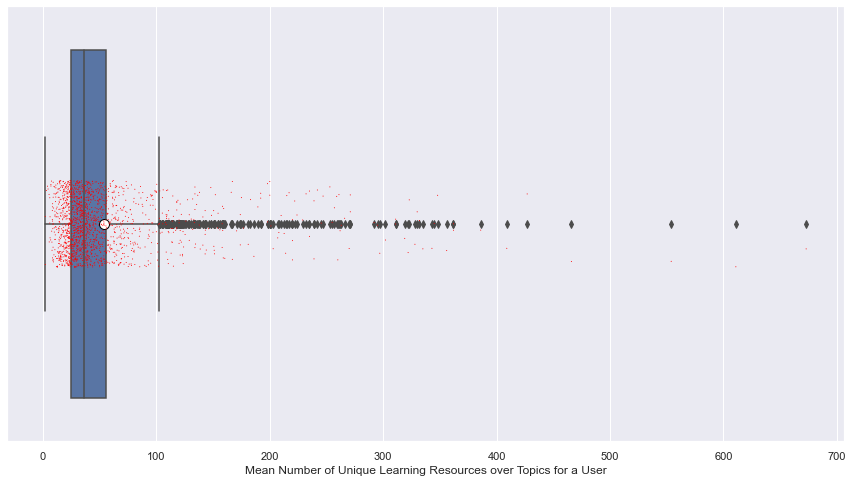

In [55]:
g = sns.boxplot(data=mean_n_unique_learning_activities_over_groups_for_user, x=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=mean_n_unique_learning_activities_over_groups_for_user, x=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR, size=1, color="red");
g.set(xlabel=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR);

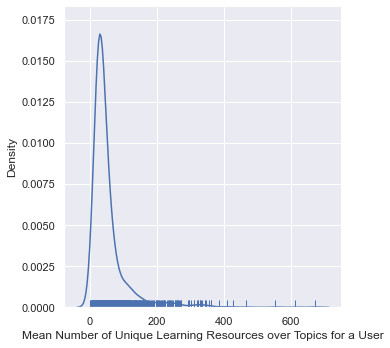

In [56]:
g = sns.displot(data=mean_n_unique_learning_activities_over_groups_for_user, x=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR);

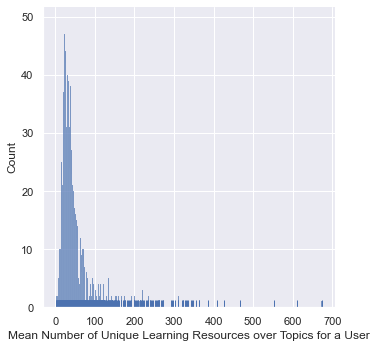

In [57]:
g = sns.displot(data=mean_n_unique_learning_activities_over_groups_for_user, x=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR, log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR);

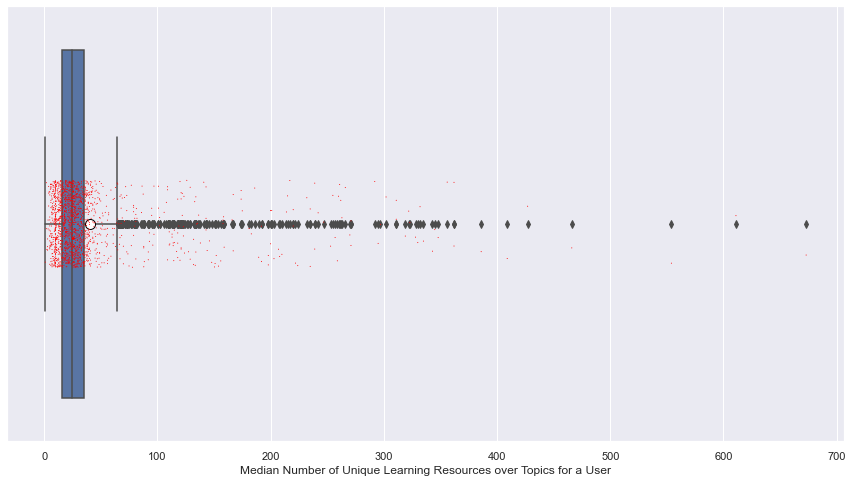

In [58]:
g = sns.boxplot(data=median_n_unique_learning_activities_over_groups_for_user, x=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=median_n_unique_learning_activities_over_groups_for_user, x=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR, size=1, color="red");
g.set(xlabel=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR);

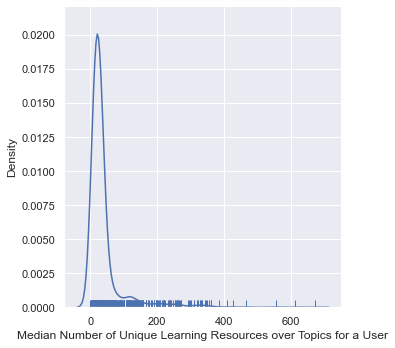

In [59]:
g = sns.displot(data=median_n_unique_learning_activities_over_groups_for_user, x=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR);

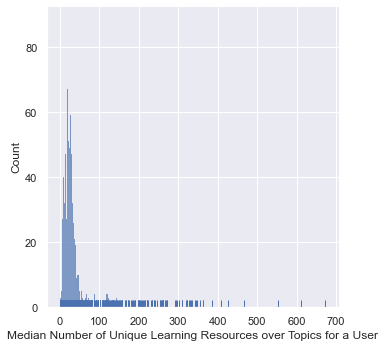

In [60]:
g = sns.displot(data=median_n_unique_learning_activities_over_groups_for_user, x=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR, log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_GROUPS_FOR_USERS_STR);

### Avg Number of Unique Learning Activities over Users for a Group

In [61]:
mean_n_unique_learning_activities_over_users_for_group, median_n_unique_learning_activities_over_users_for_group = print_and_return_avg_num_unique_col3_over_col2_for_col1(interactions, GROUP_FIELD, USER_FIELD, LEARNING_ACTIVITY_FIELD, MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR, MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR)

mean of Mean Number of Unique Learning Resources over Users for a Topic: 21.226937086762238
median of Mean Number of Unique Learning Resources over Users for a Topic: 16.707107843137255
max of Mean Number of Unique Learning Resources over Users for a Topic: 137.66666666666666
min of Mean Number of Unique Learning Resources over Users for a Topic: 1.0

__________________________________________________

mean of Median Number of Unique Learning Resources over Users for a Topic: 20.438432835820894
median of Median Number of Unique Learning Resources over Users for a Topic: 15.0
max of Median Number of Unique Learning Resources over Users for a Topic: 145.0
min of Median Number of Unique Learning Resources over Users for a Topic: 1.0


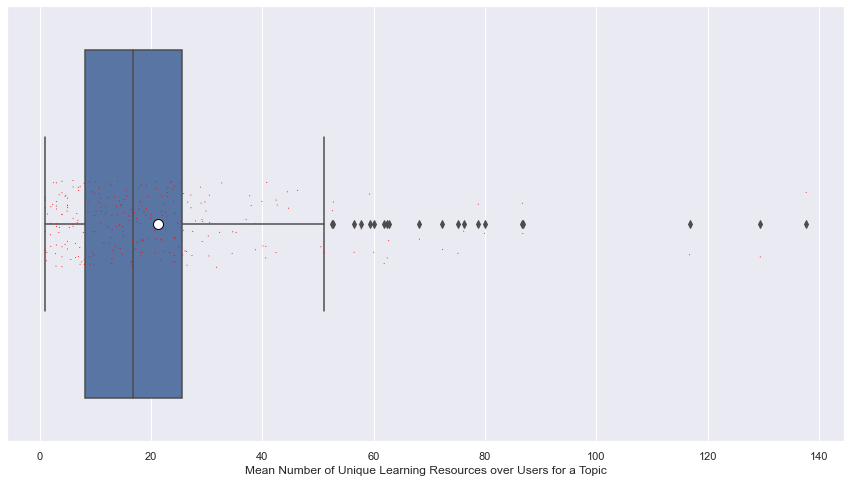

In [62]:
g = sns.boxplot(data=mean_n_unique_learning_activities_over_users_for_group, x=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=mean_n_unique_learning_activities_over_users_for_group, x=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR, size=1, color="red");
g.set(xlabel=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR);

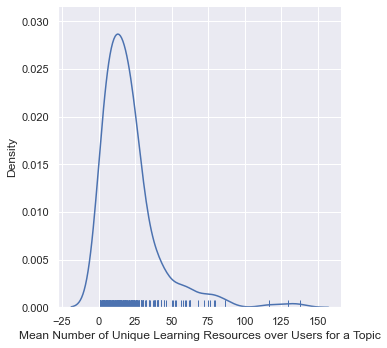

In [63]:
g = sns.displot(data=mean_n_unique_learning_activities_over_users_for_group, x=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR);

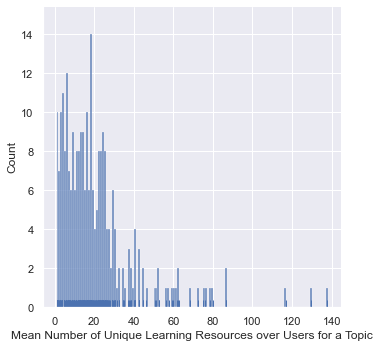

In [64]:
g = sns.displot(data=mean_n_unique_learning_activities_over_users_for_group, x=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR, log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel=MEAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR);

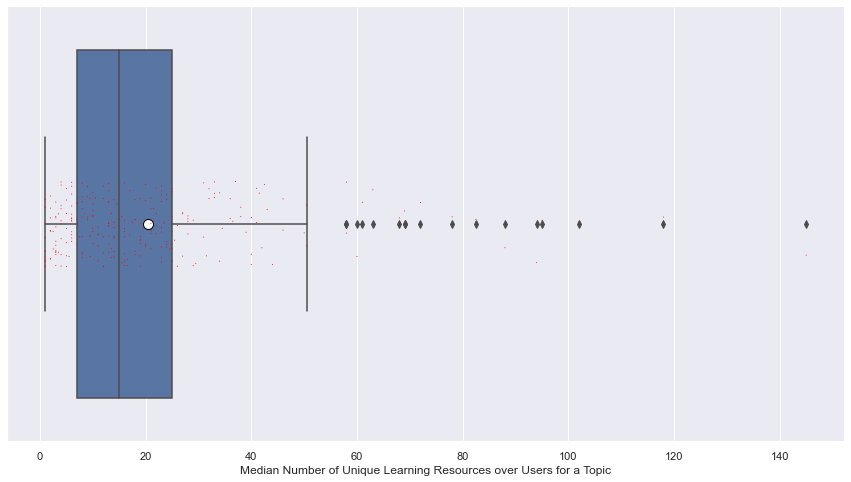

In [65]:
g = sns.boxplot(data=median_n_unique_learning_activities_over_users_for_group, x=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=median_n_unique_learning_activities_over_users_for_group, x=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR, size=1, color="red");
g.set(xlabel=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR);

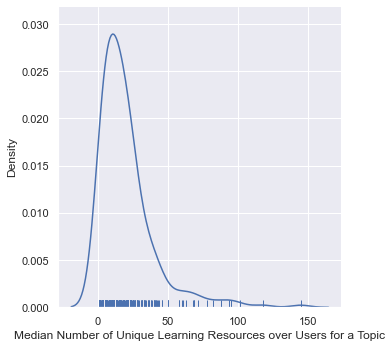

In [66]:
g = sns.displot(data=median_n_unique_learning_activities_over_users_for_group, x=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR);

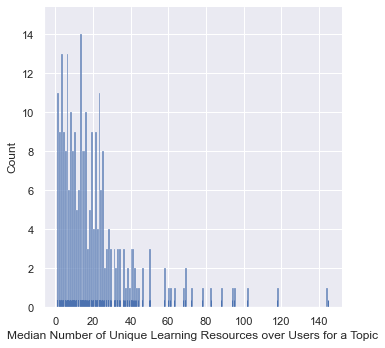

In [67]:
g = sns.displot(data=median_n_unique_learning_activities_over_users_for_group, x=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR, log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel=MEDIAN_NUMBER_UNIQUE_LEARNING_ACTIVITIES_OVER_USERS_FOR_GROUPS_STR);

### Sparsity - User_Item_Matrix

#### User-Group

In [68]:
sparsity = calculate_sparsity(interactions[USER_FIELD], interactions[GROUP_FIELD])
print(f"User-{GROUP_FIELD_NAME_STR} Sparsity: {sparsity} %")

User-Topic Sparsity: 97.61316297389588 %


#### User-Learning Activity

In [69]:
sparsity = calculate_sparsity(interactions[USER_FIELD], interactions[LEARNING_ACTIVITY_FIELD])
print(f"User-{LEARNING_ACTIVITY_FIELD_NAME_STR} Sparsity: {sparsity} %")

User-Learning Resource Sparsity: 92.77680871703143 %


## Unique Sequence Statistics

### Unique User Sequence Statistics per Group

In [ ]:
learning_activity_sequence_stats_per_group = return_col3_sequence_stats_over_col2_per_col1(interactions, 
                                                                                           GROUP_FIELD, 
                                                                                           USER_FIELD, 
                                                                                           LEARNING_ACTIVITY_FIELD,
                                                                                           TIMESTAMP_FIELD,
                                                                                           GROUP_FIELD_NAME_STR,
                                                                                           GROUP_CODE_FIELD_NAME_STR,
                                                                                           LEARNING_ACTIVITY_SEQUENCE_COUNT_NAME_STR,
                                                                                           UNIQUE_LEARNING_ACTIVITY_SEQUENCE_COUNT_NAME_STR,
                                                                                           LEARNING_ACTIVITY_SEQUENCE_NAME_STR,
                                                                                           LEARNING_ACTIVITY_SEQUENCE_FREQUENCY_NAME_STR,
                                                                                           LEARNING_ACTIVITY_SEQUENCE_FREQUENCY_PCT_NAME_STR,
                                                                                           LEARNING_ACTIVITY_SEQUENCE_LENGTH_NAME_STR)

In [ ]:
plot_sequence_stats_per_group(learning_activity_sequence_stats_per_group,
                              GROUP_CODE_FIELD_NAME_STR, 
                              LEARNING_ACTIVITY_SEQUENCE_COUNT_NAME_STR,
                              UNIQUE_LEARNING_ACTIVITY_SEQUENCE_COUNT_NAME_STR,
                              LEARNING_ACTIVITY_SEQUENCE_FREQUENCY_NAME_STR,
                              LEARNING_ACTIVITY_SEQUENCE_FREQUENCY_PCT_NAME_STR,
                              LEARNING_ACTIVITY_SEQUENCE_LENGTH_NAME_STR,
                              LEARNING_ACTIVITY_SEQUENCE_LENGTH_VS_FREQUENCY_PCT_PER_GROUP_TITLE_NAME_STR,
                              LEARNING_ACTIVITY_SEQUENCE_LENGTH_VS_FREQUENCY_PER_GROUP_TITLE_NAME_STR,
                              LEARNING_ACTIVITY_UNIQUE_VS_TOTAL_NUMBER_OF_SEQUENCES_PER_GROUP_TITLE_NAME_STR)

### Unique User Sequence Statistics

In [ ]:
learning_activity_sequence_stats = return_col2_sequence_stats_over_col1(interactions, 
                                                                        USER_FIELD, 
                                                                        LEARNING_ACTIVITY_FIELD,
                                                                        TIMESTAMP_FIELD,
                                                                        LEARNING_ACTIVITY_SEQUENCE_COUNT_NAME_STR,
                                                                        UNIQUE_LEARNING_ACTIVITY_SEQUENCE_COUNT_NAME_STR,
                                                                        LEARNING_ACTIVITY_SEQUENCE_NAME_STR,
                                                                        LEARNING_ACTIVITY_SEQUENCE_FREQUENCY_NAME_STR,
                                                                        LEARNING_ACTIVITY_SEQUENCE_FREQUENCY_PCT_NAME_STR,
                                                                        LEARNING_ACTIVITY_SEQUENCE_LENGTH_NAME_STR)

In [ ]:
plot_sequence_stats(learning_activity_sequence_stats,
                    LEARNING_ACTIVITY_SEQUENCE_COUNT_NAME_STR,
                    UNIQUE_LEARNING_ACTIVITY_SEQUENCE_COUNT_NAME_STR,
                    LEARNING_ACTIVITY_SEQUENCE_FREQUENCY_NAME_STR,
                    LEARNING_ACTIVITY_SEQUENCE_FREQUENCY_PCT_NAME_STR,
                    LEARNING_ACTIVITY_SEQUENCE_LENGTH_NAME_STR,
                    LEARNING_ACTIVITY_SEQUENCE_LENGTH_VS_FREQUENCY_PCT_TITLE_NAME_STR,
                    LEARNING_ACTIVITY_SEQUENCE_LENGTH_VS_FREQUENCY_TITLE_NAME_STR,
                    LEARNING_ACTIVITY_UNIQUE_VS_TOTAL_NUMBER_OF_SEQUENCES_TITLE_NAME_STR)

## Sequence Distance

### Sequence Distance between Users per Group

In [ ]:
seq_sim = SeqSim(interactions.head(100000), USER_FIELD, GROUP_FIELD, LEARNING_ACTIVITY_FIELD)

In [ ]:
seq_dist_per_group_dict = seq_sim.get_user_sequence_distances_per_group(td.levenshtein.distance, sample_pct=80, sample_pct_user=10)

In [ ]:
with open(PATH_TO_PICKLED_OBJECTS_FOLDER + DATASET_NAME + SEQUENCE_DISTANCE_DICT_PER_GROUP_PICKLE_NAME, 'wb') as f:
    pickle.dump(seq_dist_per_group_dict, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
avg_seq_dist_per_group_df = get_avg_seq_dist_per_group_df(seq_dist_per_group_dict)

In [ ]:
avg_seq_dist_per_group_df

In [ ]:
g = sns.boxplot(data=avg_seq_dist_per_group_df, x='mean_distance', showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=avg_seq_dist_per_group_df, x='mean_distance', size=5, color="red");
g.set(xlabel=f'Mean Sequence Distance per {GROUP_FIELD_NAME_STR}');
plt.savefig(PATH_TO_PLOT_FOLDER + DATASET_NAME + '_mean_seq_dist_per_group.png', dpi=300, bbox_inches='tight')

In [ ]:
g = sns.boxplot(data=avg_seq_dist_per_group_df, x='median_distance', showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=avg_seq_dist_per_group_df, x='median_distance', size=5, color="red");
g.set(xlabel=f'Median Sequence Distance per {GROUP_FIELD_NAME_STR}');
plt.savefig(PATH_TO_PLOT_FOLDER + DATASET_NAME + '_median_seq_dist_per_group.png', dpi=300, bbox_inches='tight')

In [ ]:
g = sns.displot(data=avg_seq_dist_per_group_df, x='mean_distance', log_scale=False, kind='kde', rug=True)
g.set(xlabel=f'Mean Sequence Distance per {GROUP_FIELD_NAME_STR}');

In [ ]:
g = sns.displot(data=avg_seq_dist_per_group_df, x='median_distance', log_scale=False, kind='kde', rug=True)
g.set(xlabel=f'Median Sequence Distance per {GROUP_FIELD_NAME_STR}');

In [ ]:
g = sns.boxplot(data=avg_seq_dist_per_group_df, x='mean_normalized_distance', showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=avg_seq_dist_per_group_df, x='mean_normalized_distance', size=5, color="red");
g.set(xlabel=f'Mean Normalized Sequence Distance per {GROUP_FIELD_NAME_STR}');
plt.savefig(PATH_TO_PLOT_FOLDER + DATASET_NAME + '_mean_normalized_seq_dist_per_group.png', dpi=300, bbox_inches='tight')

In [ ]:
g = sns.boxplot(data=avg_seq_dist_per_group_df, x='median_normalized_distance', showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=avg_seq_dist_per_group_df, x='median_normalized_distance', size=5, color="red");
g.set(xlabel=f'Median Normalized Sequence Distance per {GROUP_FIELD_NAME_STR}');
plt.savefig(PATH_TO_PLOT_FOLDER + DATASET_NAME + '_median_normalized_seq_dist_per_group.png', dpi=300, bbox_inches='tight')

In [ ]:
g = sns.displot(data=avg_seq_dist_per_group_df, x='mean_normalized_distance', log_scale=False, kind='kde', rug=True)
g.set(xlabel=f'Mean Normalized Sequence Distance per {GROUP_FIELD_NAME_STR}');

In [ ]:
g = sns.displot(data=avg_seq_dist_per_group_df, x='median_normalized_distance', log_scale=False, kind='kde', rug=True)
g.set(xlabel=f'Median Normalized Sequence Distance per {GROUP_FIELD_NAME_STR}');

In [ ]:
g = sns.regplot(data=avg_seq_dist_per_group_df, x='mean_distance', y='mean_user_sequence_length')
g.set(xlabel=f'Mean Sequence Distance per {GROUP_FIELD_NAME_STR}', ylabel=f'Mean Sequence Length per {GROUP_FIELD_NAME_STR}');

In [ ]:
g = sns.regplot(data=avg_seq_dist_per_group_df, x='mean_normalized_distance', y='mean_user_sequence_length')
g.set(xlabel=f'Mean Normalized Sequence Distance per {GROUP_FIELD_NAME_STR}', ylabel=f'Mean Sequence Length per {GROUP_FIELD_NAME_STR}');

In [ ]:
g = sns.regplot(data=avg_seq_dist_per_group_df, x='mean_distance', y='mean_max_seq_length_per_group')
g.set(xlabel=f'Mean Sequence Distance per {GROUP_FIELD_NAME_STR}', ylabel=f'Mean Max Sequence Length per {GROUP_FIELD_NAME_STR}');

In [ ]:
g = sns.regplot(data=avg_seq_dist_per_group_df, x='mean_normalized_distance', y='mean_max_seq_length_per_group')
g.set(xlabel=f'Mean Normalized Sequence Distance per {GROUP_FIELD_NAME_STR}', ylabel=f'Mean Max Sequence Length per {GROUP_FIELD_NAME_STR}');

### Sequence Distance between Users 

In [ ]:
seq_sim = SeqSim(interactions.head(50000), USER_FIELD, GROUP_FIELD, LEARNING_ACTIVITY_FIELD)

In [ ]:
seq_dist_dict = seq_sim.get_user_sequence_distances(td.levenshtein.distance, sample_pct=20)

In [ ]:
with open(PATH_TO_PICKLED_OBJECTS_FOLDER + DATASET_NAME + SEQUENCE_DISTANCE_DICT_PICKLE_NAME, "wb") as f:
    pickle.dump(seq_dist_dict, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
seq_dist_df = get_seq_dist_df(seq_dist_dict)

In [ ]:
seq_dist_df

In [ ]:
g = sns.boxplot(data=seq_dist_df, x='distance', showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=seq_dist_df, x='distance', size=5, color="red");
g.set(xlabel=f'Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair');
plt.savefig(PATH_TO_PLOT_FOLDER + DATASET_NAME + '_seq_dist_per_user_combination_pair.png', dpi=300, bbox_inches='tight')

In [ ]:
g = sns.displot(data=seq_dist_df, x='distance', log_scale=False, kind='kde', rug=True)
g.set(xlabel=f'Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair');

In [ ]:
g = sns.boxplot(data=seq_dist_df, x='normalized_distance', showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=seq_dist_df, x='normalized_distance', size=5, color="red");
g.set(xlabel=f'Normalized Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair');
plt.savefig(PATH_TO_PLOT_FOLDER + DATASET_NAME + '_normalized_seq_dist_per_user_combination_pair.png', dpi=300, bbox_inches='tight')

In [ ]:
g = sns.displot(data=seq_dist_df, x='normalized_distance', log_scale=False, kind='kde', rug=True)
g.set(xlabel=f'Normalized Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair');

In [ ]:
g = sns.regplot(data=seq_dist_df, x='distance', y='mean_user_sequence_length_per_combination')
g.set(xlabel=f'Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair', ylabel=f'Mean Sequence Length per {USER_FIELD_NAME_STR}-Combination Pair');

In [ ]:
g = sns.regplot(data=seq_dist_df, x='normalized_distance', y='mean_user_sequence_length_per_combination')
g.set(xlabel=f'Normalized Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair', ylabel=f'Mean Sequence Length per {USER_FIELD_NAME_STR}-Combination Pair');

In [ ]:
g = sns.regplot(data=seq_dist_df, x='distance', y='max_user_sequence_length_per_combination')
g.set(xlabel=f'Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair', ylabel=f'Max Sequence Length per {USER_FIELD_NAME_STR}-Combination Pair');

In [ ]:
g = sns.regplot(data=seq_dist_df, x='normalized_distance', y='max_user_sequence_length_per_combination')
g.set(xlabel=f'Normalized Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair', ylabel=f'Max Sequence Length per {USER_FIELD_NAME_STR}-Combination Pair');